In [1]:
#task
#Predicting the price of diamond based on other feature
#credits to kaggle for the dataset...link...https://www.kaggle.com/shubhankitsirvaiya06/diamond-price-prediction

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
%matplotlib inline

In [3]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/project 5-diamond/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#exploring the dataset
df.groupby('cut')['cut'].agg('count')

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
31650,0.35,Ideal,E,VS2,61.5,55.0,767,4.52,4.56,2.79
40511,0.45,Good,F,VS1,57.6,62.5,1144,5.05,5.09,2.91
29947,0.25,Ideal,H,VS1,62.6,53.0,445,4.04,4.08,2.54
49272,0.54,Ideal,G,VVS2,61.5,54.0,2090,5.26,5.24,3.23
24773,1.51,Premium,F,VS1,62.7,59.0,13134,7.31,7.23,4.56


In [7]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
#first we gonna handle any missing values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
#we dont have any missing values on our dataset

In [10]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
#im gonna create two columns (price per depth & price per table)
#this helps in the outlier detection and removal
df['price_per_depth']=df['price']/df['depth']
df['price_per_table']=df['price']/df['table']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.300813,5.927273
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.451505,5.344262
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.746924,5.030769
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.352564,5.758621
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.292259,5.775862


In [12]:
df.describe()

,carat,depth,table,price,x,y,z,price_per_depth,price_per_table
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,63.742880,68.204301
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,64.775853,69.019633
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,5.176651,5.030769
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,15.394525,16.733333
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,39.001623,41.949986
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,86.419355,92.346340
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,325.852373,354.615385


Text(0, 0.5, 'price')

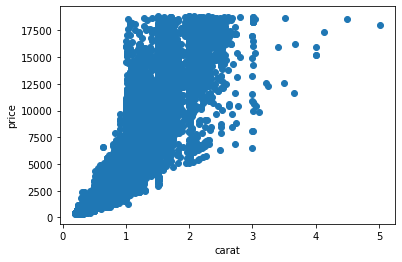

In [13]:
#lets do some visualizations
plt.scatter(df.carat,df.price)
plt.xlabel('carat')
plt.ylabel('price')

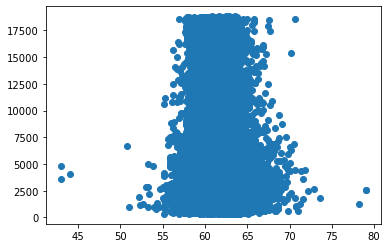

In [14]:
plt.scatter(df.depth,df.price)

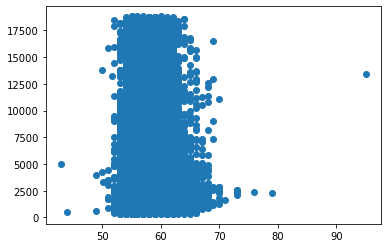

In [15]:
plt.scatter(df.table,df.price)

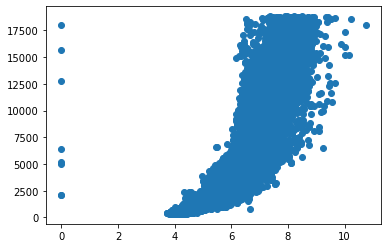

In [16]:
plt.scatter(df.x,df.price)

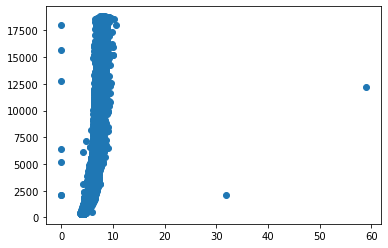

In [17]:
plt.scatter(df.y,df.price)

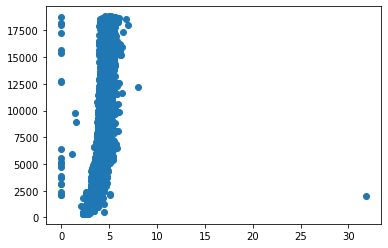

In [18]:
plt.scatter(df.z,df.price)

In [19]:
df1=df.copy()
df1.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table
14962,1.21,Premium,H,SI1,59.5,58.0,6025,7.02,6.96,4.16,101.260504,103.879310
32275,0.30,Premium,G,VVS1,60.7,58.0,789,4.34,4.36,2.64,12.998353,13.603448
29186,0.30,Ideal,E,VS1,61.3,58.0,694,4.29,4.32,2.64,11.321370,11.965517


Text(0, 0.5, 'count')

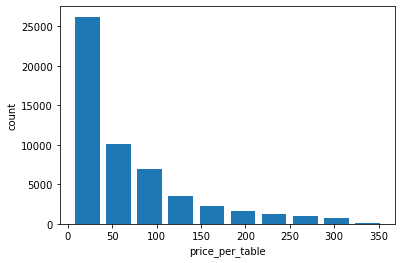

In [20]:
#handling outliers
plt.hist(df1.price_per_table,rwidth=0.8)
plt.xlabel('price_per_table')
plt.ylabel('count')

In [21]:
df1.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.300813,5.927273
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.451505,5.344262


In [22]:
df1['x_zscore']=(df1['x']-df1['x'].mean())/df1['x'].std()
df1['y_zscore']=(df1['y']-df1['y'].mean())/df1['y'].std()
df1['z_zscore']=(df1['z']-df1['z'].mean())/df1['z'].std()
df1.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table,x_zscore,y_zscore,z_zscore
4399,0.31,Very Good,D,SI1,60.2,56.0,571,4.37,4.40,2.64,9.485050,10.196429,-1.213411,-1.168449,-1.273537
35821,0.31,Ideal,F,IF,62.0,55.0,914,4.36,4.38,2.71,14.741935,16.618182,-1.222326,-1.185960,-1.174345
47539,0.55,Ideal,F,VS2,62.1,55.0,1871,5.27,5.25,3.26,30.128824,34.018182,-0.411101,-0.424228,-0.394976


In [23]:
df1[df1.x_zscore<-2]
#so we can filter those values with more than 2 zscores(simply means those values with more than 2 stds)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table,x_zscore,y_zscore,z_zscore
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0,80.422078,88.464286,-5.109073,0.775280,-5.01451
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0,81.184834,96.962264,-5.109073,-5.020884,-5.01451
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0,110.973913,95.238806,-5.109073,-5.020884,-5.01451
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0,205.787781,237.037037,-5.109073,-5.020884,-5.01451
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0,252.592593,265.864407,-5.109073,-5.020884,-5.01451
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0,287.165605,305.661017,-5.109073,-5.020884,-5.01451
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,33.229329,35.500000,-5.109073,-5.020884,-5.01451
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,33.229329,35.500000,-5.109073,-5.020884,-5.01451


In [24]:
df1[(df1.x_zscore<-3) | (df1.x_zscore>3)].head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table,x_zscore,y_zscore,z_zscore
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,80.422078,88.464286,-5.109073,0.775280,-5.014510
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,81.184834,96.962264,-5.109073,-5.020884,-5.014510
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,110.973913,95.238806,-5.109073,-5.020884,-5.014510
16283,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77,103.201268,118.400000,3.119063,2.946653,3.161782
19339,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67,128.229665,138.620690,3.003174,2.832831,3.020079


In [25]:
df2=df1[(df1.x_zscore>-2) & (df1.x_zscore<2)]
df2.shape

(51979, 15)

In [26]:
df2[(df2.y_zscore<-2) | (df2.y_zscore>2)]
df3=df2[(df2.y_zscore>-2) & (df2.y_zscore<2)]
df3.shape

(51954, 15)

In [27]:
df3[(df3.z_zscore<-2) | (df3.z_zscore>2)]
df4=df3[(df3.z_zscore>-2) & (df3.z_zscore<2)]
df4.shape

(51724, 15)

In [28]:
#using IQR to filter outliers on price_per_depth and price_per_table columns

In [29]:
Q1,Q3=df4.price_per_depth.quantile([0.25,0.75])
Q1,Q3

(14.984126501135993, 79.29097290758014)

In [30]:
IQR=Q3-Q1
IQR

64.30684640644415

In [31]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-81.47614310853024, 175.75124251724637)

In [32]:
df4[(df4.price_per_depth<lower_limit) | (df4.price_per_depth>upper_limit)]
df5=df4[(df4.price_per_depth>lower_limit) & (df4.price_per_depth<upper_limit)]
df5.shape

(49308, 15)

In [33]:
Q11,Q33=df5.price_per_table.quantile([0.25,0.75])
Q11,Q33

(15.839285714285714, 77.52631578947368)

In [34]:
IQR2=Q33-Q11
IQR2

61.68703007518797

In [35]:
lower_limit1=Q11-1.5*IQR2
upper_limit1=Q33+1.5*IQR2
lower_limit1,upper_limit1

(-76.69125939849624, 170.05686090225564)

In [36]:
df5[(df5.price_per_table<lower_limit1) | (df5.price_per_table>upper_limit1)]
df6=df5[(df5.price_per_table>lower_limit1) & (df5.price_per_table<upper_limit1)]
df6.shape

(48381, 15)

In [37]:
df6.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table,x_zscore,y_zscore,z_zscore
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.300813,5.927273,-1.587823,-1.536181,-1.571115
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.451505,5.344262,-1.641310,-1.658759,-1.741159
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.746924,5.030769,-1.498677,-1.457382,-1.741159


Text(0, 0.5, 'count')

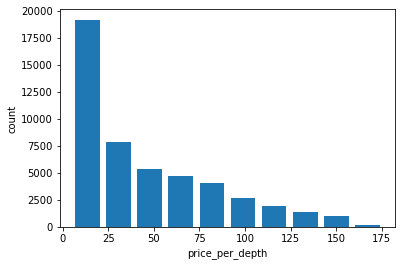

In [38]:
plt.hist(df6.price_per_depth,rwidth=0.8)
plt.xlabel('price_per_depth')
plt.ylabel('count')

In [39]:
#getting the x,y,zsquared columns to help in outlier removal
df6['x2']=df6['x']**2
df6['y2']=df6['y']**2
df6['z2']=df6['z']**2
df6.head(2)

<ipython-input-39-8389098eaf7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['x2']=df6['x']**2
<ipython-input-39-8389098eaf7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['y2']=df6['y']**2
<ipython-input-39-8389098eaf7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_depth,price_per_table,x_zscore,y_zscore,z_zscore,x2,y2,z2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.300813,5.927273,-1.587823,-1.536181,-1.571115,15.6025,15.8404,5.9049
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.451505,5.344262,-1.641310,-1.658759,-1.741159,15.1321,14.7456,5.3361


In [40]:
ll1,ul1=df6.x2.quantile([0.01,0.95])
ll1,ul1

(16.0, 49.0)

In [41]:
df6[(df6.x2<ll1) | (df6.x2>ul1)]
df7=df6[(df6.x2>ll1) & (df6.x2<ul1)]
df7.shape

(45416, 18)

In [42]:
ll2,ul2=df7.y2.quantile([0.01,0.95])
ll2,ul2

(17.0569, 45.697599999999994)

In [43]:
df7[(df7.y2<ll2) | (df7.y2>ul2)]
df8=df7[(df7.y2>ll2) & (df7.y2<ul2)]
df8.shape

(42664, 18)

In [44]:
ll3,ul3=df8.z2.quantile([0.01,0.95])
ll3,ul3

(6.708099999999999, 16.6464)

In [45]:
df8[(df8.z2<ll3) | (df8.z2>ul3)]
df9=df8[(df8.z2>ll3) & (df8.z2<ul3)]
df9.shape

(39957, 18)

Text(0, 0.5, 'count')

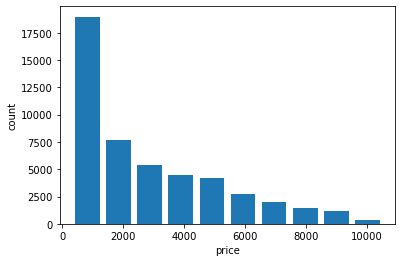

In [46]:
plt.hist(df6.price,rwidth=0.8)
plt.xlabel('price')
plt.ylabel('count')

In [47]:
#dropping some unneccesary columns
df10=df9.drop(['price_per_depth','price_per_table','x_zscore','y_zscore','z_zscore',
              'x2','y2','z2'],axis='columns')
df10.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68


In [48]:
#getting dummy values for 'cut','color','clarity' columns
#this time we gonna use labelencoder to create dummy variables for the 3 columns

from sklearn.preprocessing import LabelEncoder

le_cut=LabelEncoder()
le_color=LabelEncoder()
le_clarity=LabelEncoder()

In [49]:
df10['cut']=le_cut.fit_transform(df10.cut)
df10['color']=le_color.fit_transform(df10.color)
df10.clarity=le_clarity.fit_transform(df10.clarity)
df10.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
10,0.30,1,6,2,64.0,55.0,339,4.25,4.28,2.73
13,0.31,2,6,3,62.2,54.0,344,4.35,4.37,2.71
15,0.32,3,1,0,60.9,58.0,345,4.38,4.42,2.68


In [50]:
#preparing X,y datasets 
X=df10.drop('price',axis=1)
X.shape

(39957, 9)

In [51]:
y=df10.price
y.shape

(39957,)

In [52]:
#spliting our dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:
len(X_train)

31965

In [54]:
len(X_test)

7992

In [55]:
#using gridsearchcv to get the best algorithm  with best params so as to create my model for price prediction
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [56]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        },
        'gaussian':{
            'model':GaussianNB(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [57]:
#find_best_model_using_gridsearchcv(X_train,y_train)

In [58]:
#can run the above code in a GPU for a faster processing

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(LinearRegression(),X_train,y_train)

array([0.87387439, 0.87317168, 0.87360889, 0.87451274, 0.87596656])

In [61]:
cross_val_score(Lasso(),X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8398805.757392883, tolerance: 8363534.826646024
  model = cd_fast.enet_coordinate_descent(


array([0.87207475, 0.87359106, 0.87295977, 0.87367719, 0.87450537])

In [62]:
#cross_val_score(LogisticRegression(),X_train,y_train)

In [63]:
#cross_val_score(GaussianNB(),X_train,y_train)

In [64]:
#cross_val_score(SVC(),X_train,y_train)

In [65]:
#cross_val_score(DecisionTreeRegressor(),X_train,y_train)#

In [66]:
#cross_val_score((RandomForestClassifier),X_train,y_train)

In [67]:
#from the scores  above for various algorithms above i am gonna use 

In [68]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [69]:
model.score(X_test,y_test)

0.8758185949541045

In [71]:
y_predicted=model.predict(X_test)
y_predicted[:10]

array([2068.5824116 , 2978.96554524, 1841.89657871,  960.06774559,
       1212.55131467, 4991.8644364 ,  291.62922579, 5049.99869444,
       3148.79819054, 1372.66126738])

In [72]:
y_test[:10]

48273    1956
190      2777
46549    1781
36150     928
43443    1415
13800    5624
30610     447
6826     4120
3637     3434
42745    1343
Name: price, dtype: int64

In [77]:
X_test.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
48273,0.53,2,0,5,61.7,55.0,5.23,5.21,3.22
190,0.71,1,2,5,57.8,60.0,5.87,5.90,3.40


In [73]:
#the model is doing near correct predictions ,so that pretty good

In [78]:
model.predict([[0.53,3,1,6,61.6,56.0,5.15,6.54,4.3]])

array([202.87781945])

In [80]:
#now im gonna save my model as a pickle file and my columns as a json file
import pickle
with open('diamond_price_prediction.picke','wb') as f:
    pickle.dump(model,f)

In [81]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('diamonds_prediction_columns.jason','w') as f:
    f.write(json.dumps(columns))